# Supervised Learning - Foundations: ReCell 
## Daniele Pelizan

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# To help in making the Python code more structured automatically
%load_ext nb_black

# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)  # adds a nice background to the graphs

# Removes the limit from the number of displayed columns and rows
pd.set_option("display.max_column", None)  # None will print all the columns
pd.set_option("display.max_row", 250)  # 250 will print 250 rows

# To split the data into train and test
from sklearn.model_selection import train_test_split

# To build a linear regression model
import statsmodels.api as sm

# To check the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# Loading the dataset
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking the shape of the data frame
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset.")

There are 3454 rows and 15 columns in the dataset.


<IPython.core.display.Javascript object>

In [4]:
# Visualizing 10 random rows of the dataset
data.sample(10, random_state=5)
# Set the random_state to make sure that we get the same results every time

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
1825,Meizu,Android,12.88,yes,no,21.0,5.0,32.0,4.0,3050.0,168.0,2015,752,388.89,127.30
698,Asus,Android,15.90,yes,no,NaN,8.0,64.0,4.0,4000.0,165.0,2019,397,310.53,86.73
2997,Xiaomi,Android,12.83,no,no,13.0,5.0,32.0,4.0,3100.0,199.0,2014,1017,121.05,73.04
667,Apple,iOS,10.34,yes,no,8.0,1.2,16.0,4.0,1810.0,129.0,2014,877,361.50,50.94
697,Asus,Android,15.90,yes,no,NaN,8.0,32.0,4.0,4000.0,165.0,2019,524,299.27,113.06
819,BlackBerry,Android,15.21,yes,no,NaN,16.0,64.0,4.0,4000.0,170.0,2018,629,348.29,109.28
3365,Motorola,Android,15.34,yes,no,NaN,8.0,32.0,3.0,4000.0,189.4,2020,101,169.99,97.42
1896,Micromax,Android,10.34,no,no,5.0,2.0,16.0,4.0,2000.0,158.0,2014,797,90.06,47.22
3381,Motorola,Android,15.34,yes,no,48.0,25.0,128.0,4.0,3600.0,165.0,2019,422,254.99,206.65
1757,LG,Android,12.57,yes,no,8.0,1.3,16.0,4.0,2300.0,130.0,2013,633,261.47,69.54


<IPython.core.display.Javascript object>

* There are some missing values in the main_camera_mp - the resolution of the rear camera.
* The brand_name column has a variety of manufacturing brands.
* The 4g and 5g are a yes or no column.
* The days_used column has a wide range of values (a few hundreds to thousands).
* The numeric columns don't contain symbols or letters.

In [5]:
# Creating a copy of the data so the original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# Checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no dupicate values in the data.

In [7]:
# Checking the data type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

* There are 4 categorical variables (*object* type) and 11 numerical variables (*float* and *int* type) in the dataset.
* The dependent variable is the used_price column - the price of a used device, which is of *float* type.

In [8]:
# Checking for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

* There are some few missing values in some columns and a lot of missing values in the main_camera_mp column.

In [9]:
# Checking the summary statistics from the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

* There are 34 brands of phones and tablets in the dataset.
* The average price of a used device is 92 € and of a new device is 237 €.
* There is a wide range of price for the used (4.6 € to 749.5 €) and new devices (18.2 € to 2560 €).

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

### Univariate analysis

In [10]:
# For numerical variables we want to study the dispersion and central tendency
# For this purpose we are going to plot histograms and box plots
# We are going to create a function that generates the plots
# This function takes the numerical variable as the input


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    # Using the function fig, ax = plt.subplots() to create 2 subplots
    # The subplots will be on top of each other: nrows = 2
    # The subplots will share the x-axis: sharex = True
    # The first subplot, ax_box2, will have 25% of the figure size: gridspec_kw={'height_ratios':(0.25, 0.75)}
    # The second subplot, ax_hist2, will have 75% of the figure size: gridspec_kw={'height_ratios':(0.25, 0.75)}

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Creating the boxplot in the first subplot ax_box2, with the mean value displayed as a triangle (showmeans=True)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="red")

    # Creating an histogram in the second subplot ax_hist2
    # with an specificied number of bins if it was given in the function
    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="blue"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="blue")

    # Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    # Add median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label="Median"
    )
    # Add a legend to the histogram and position it outside the plot
    ax_hist2.legend(bbox_to_anchor=(1, 1))

<IPython.core.display.Javascript object>

### used_price  -  Dependent variable
1 - What does the distribution of used device prices look like?

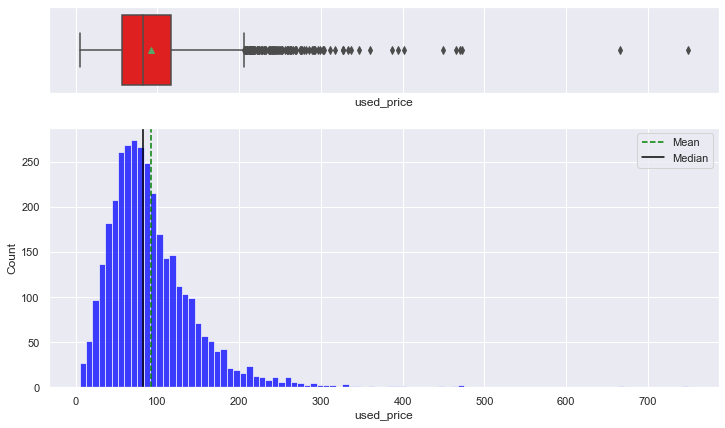

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(df, "used_price")

* The distribution of the price of used devices is right skewed, wiht few devices costing more than 200 €.
* The median value of a used device is around 80 €.

### new_price

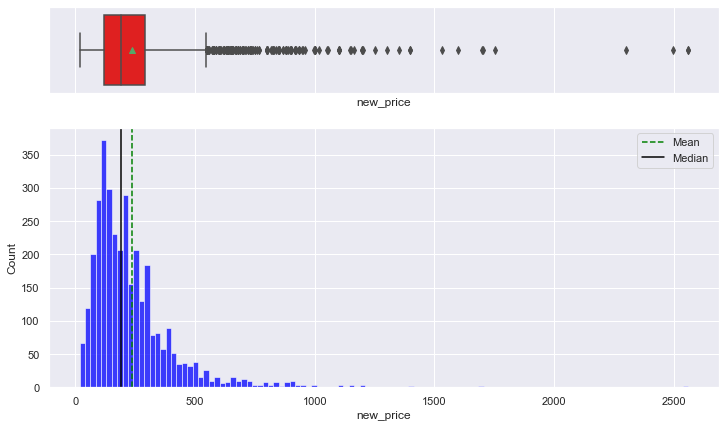

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df, "new_price")

* The distribution of the price of new devices is right skewed, with a median around 200 €.
* Few devices have a price greater than 500 €.

### screen_size

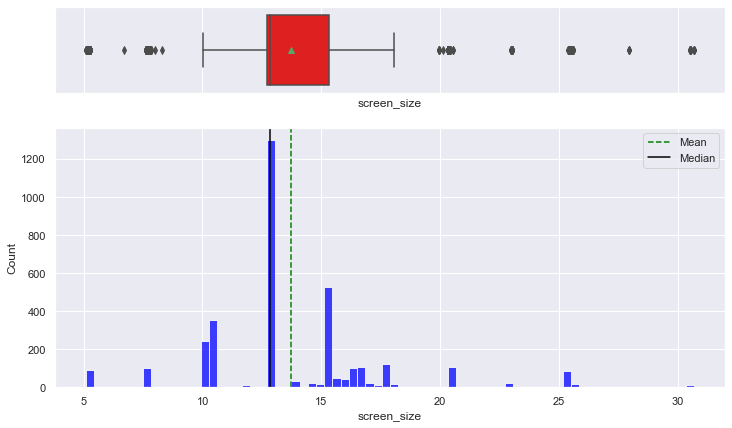

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(df, "screen_size")

* The average screen size is around 14 cm. There are outliers on the left and right side of the plot. As we have phones and tablets in this dataset, is expected to have a large range of screen sizes.

### main_camera_mp

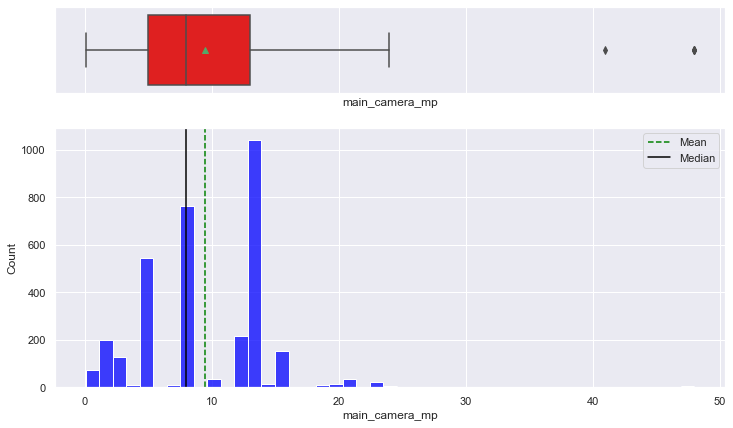

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(df, "main_camera_mp")

* The distribution of the resolution of the rear camera is slightly right skewed with a resolution median of 8 megapixel. It has a few big outliers.

### selfie_camera_mp

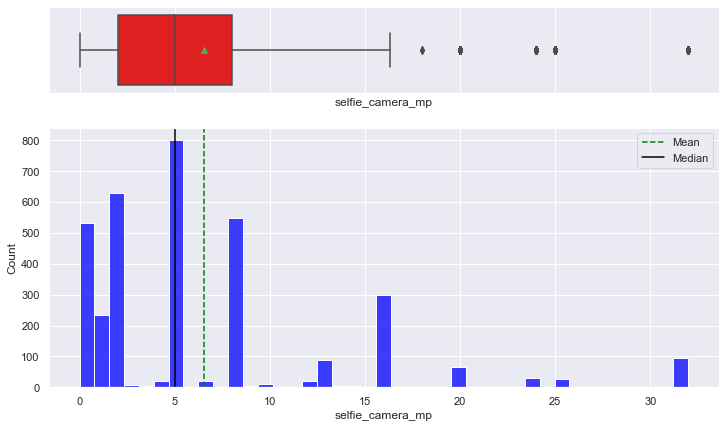

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "selfie_camera_mp")

* The distribution of the resolution of the front camera is slightly right skewd with a resolution median of 5 megapixel.

### int_memory

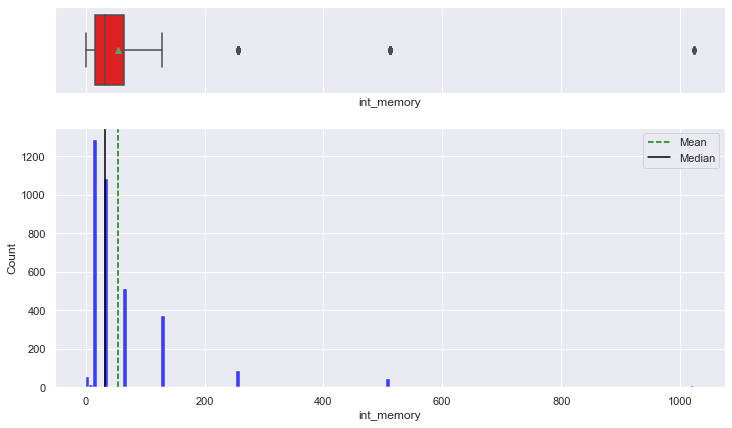

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "int_memory")

* The distribution of the amount of internal memory is heavily right skewed.

### ram

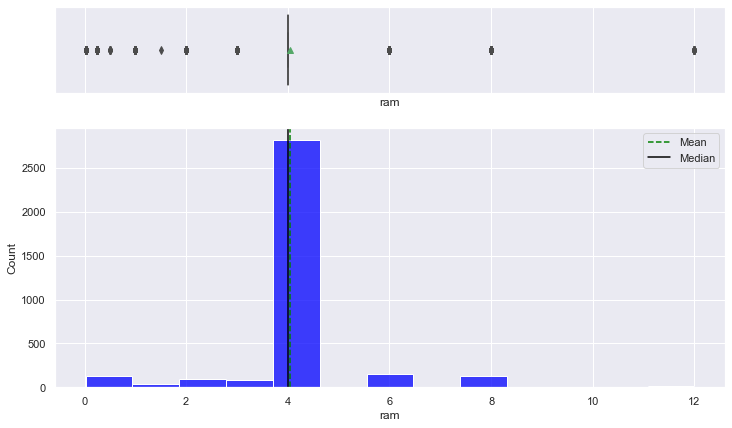

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "ram")

* The mean and median of the amount of RAM is 4 GB. The majority of the devices have 4 GB of RAM. There are outliers in the right and left side of the plot.

### battery

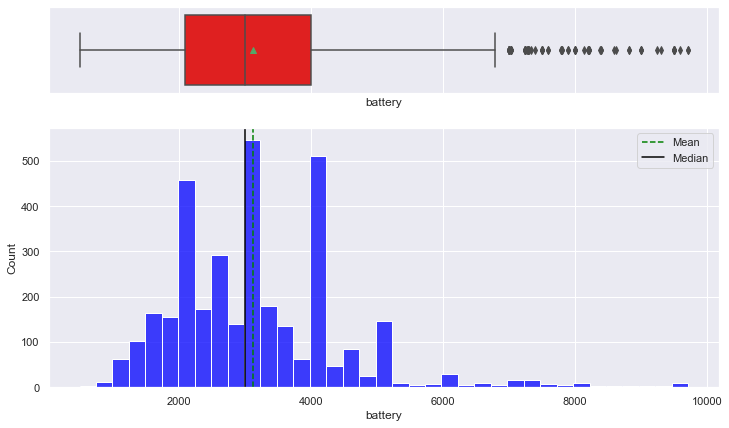

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "battery")

* The distribution of the capacity of the battery is slightly right skewed.

### weight

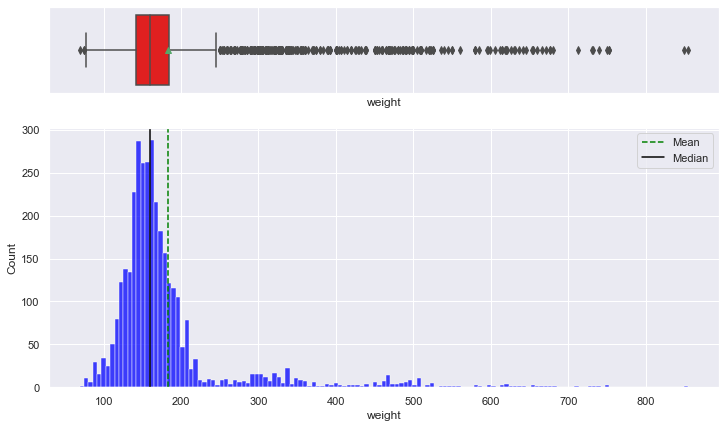

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "weight")

* The distribution of the weight of the device is right skewed, wiht a wide range of values. This is expected since we have tablets and phones in this dataset.
* Few devices have a weight greater than 250 grams.

### release_year

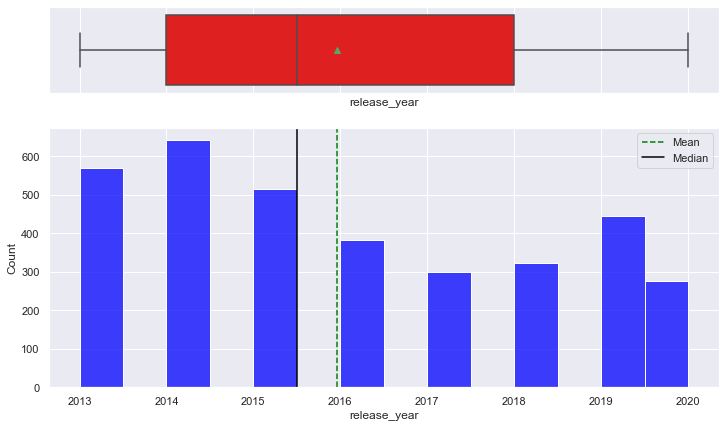

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "release_year")

* A great number of the devices in our dataset were released in 2013, 2014 and 2015.

### days_used

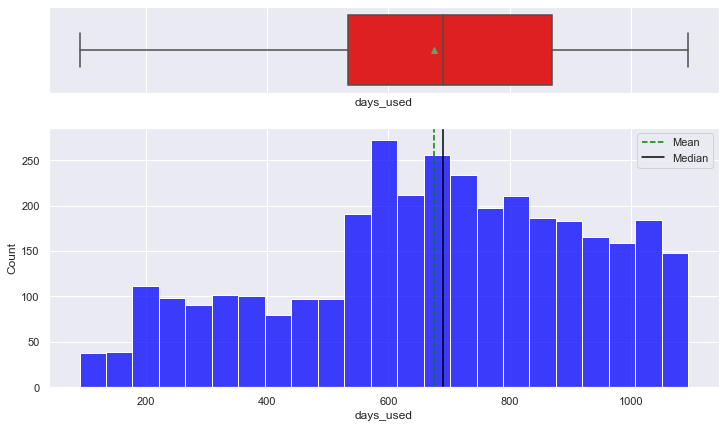

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "days_used")

* The distribution of the number of days the device has been used is slightly left skewed. 

In [22]:
# For categorical variables we want to study the number of observations in each category
# For this purpose we are going to plot a bar graph using the countplot function
# We are going to create a function that generates the plots
# This function takes the categorical variable as the input
# The bars will be labeled with the number of observations
# For the argument perc=True the bar will be labeled with the percentage of observations
# For the argument n= any integer number, the plot will have the n bars with the biggest number of obervations


def labeled_barplot(data, feature, perc=False, n=None):

    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column - number of rows in that column
    count = data[feature].nunique()  # nunique is number of unique values

    # Determining the figure size considering the number of bars
    if n is None:
        plt.figure(
            figsize=(count + 2, 7)
        )  # count+1 :the number of bars that we have + 1
    else:
        plt.figure(figsize=(n + 2, 7))  # n+1: number of bars that we want + 1

    plt.xticks(rotation=90, fontsize=15)  # Rotating the x axis labels

    # Creating the bar plot with a variable ax assigned to our plot. Then latter we can make manipulatios in this plot.
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    # Iterating over the bars one-by-one using the patches function to count the number of bars
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # calculating the percentage of each class of the category
        else:
            label = p.get_height()  # count of each class of the category

        # Get the x coordinate of the text by getting the width of the bar in which we are going to put our label
        x = p.get_x() + p.get_width() / 2

        # Get the y coordinate of the text by getting the height of the bar
        y = p.get_height()

        # Writing our label in the x,y coordinates over the bar,
        # and leave some space between the label and the boundary of the bar (xytext)
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()  # Show the plot

<IPython.core.display.Javascript object>

### brand_name

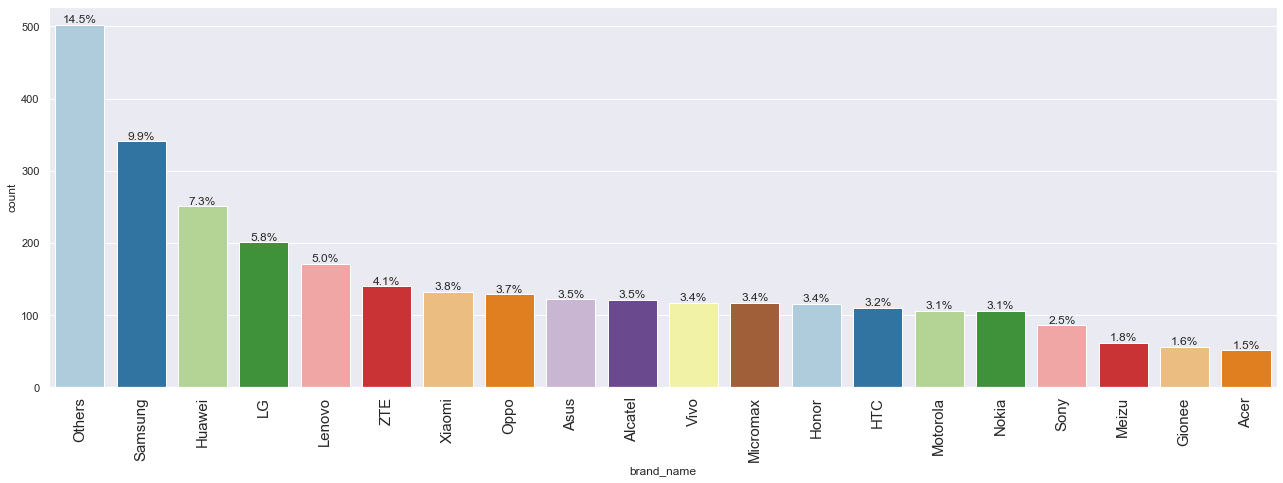

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "brand_name", perc=True, n=20)

* There are 34 manufacturing brands in the dataset. We are visualizing the first 20 brands.
* 14.5% of the devices are classified as Others.
* The most popular brand is Samsung.

### os
2 - What percentage of used device market is dominated by Android devices?

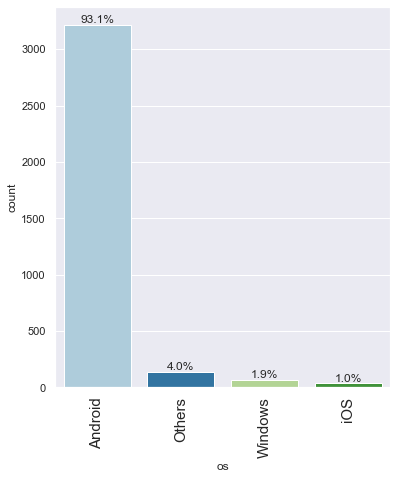

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "os", perc=True)

* 93% of the devices has an Android operational system.

## 4g

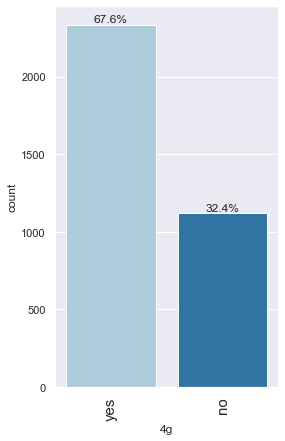

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "4g", perc=True)

* 67% of the devices have 4G.

### 5g

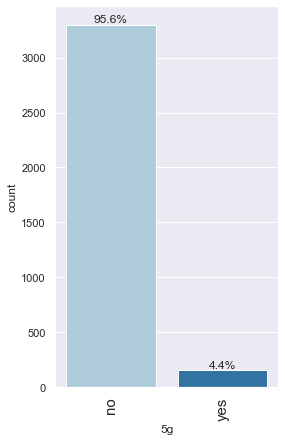

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "5g", perc=True)

* Only 4.4% of the devices have 5G.

### Bivariate analysis

### Let's check the variation in the used_price with the categorical variables

In [27]:
# Let's create a function to plot boxplots with the numeric and categorical variable

def boxplot_categorical(data, x, y, figure_size):
    """
    Boxplot 

    data: dataframe
    x: numerical variable
    y: categorical variable
    figure_size: size of the plot (n row, n column)
    The means are displayed as a star
    """
    
    plt.figure(figsize=figure_size)
    
    sns.boxplot(data=data, y=y, x=x, showmeans=True,
                meanprops={"marker": "*", "markeredgecolor": "black", "markersize": "8"}, 
                order=data.groupby(y)[x].mean().sort_values(ascending=False).index)
    plt.show()



<IPython.core.display.Javascript object>

### used_price vs brand_name

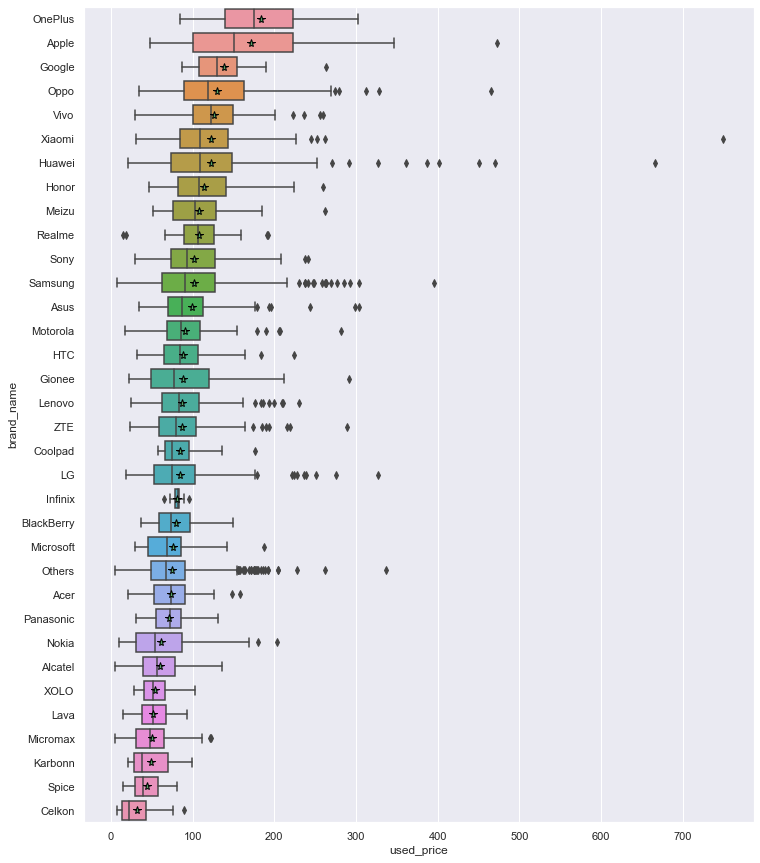

<IPython.core.display.Javascript object>

In [28]:
# Let's plot a boxplot to check the distribution of used_price by brand, with the mean value marked as a star
boxplot_categorical(data=df, x="used_price", y="brand_name", figure_size=(12, 15))

* The price of an used device is bigger for OnePlus and Apple brands.
* Sony, Samsung and Asus have a very similar average used price.

### used_price vs os

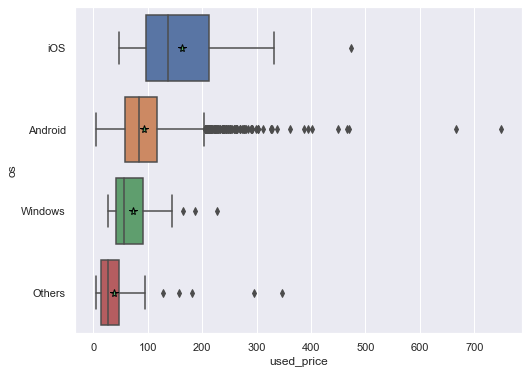

<IPython.core.display.Javascript object>

In [29]:
# Let's plot a boxplot to check the distribution of used_price by os, with the mean value marked as a star
boxplot_categorical(data=df, x="used_price", y="os", figure_size=(8, 6))

* The price of an used device is bigger for devices with operating system iOS.

###  used_price and 4g

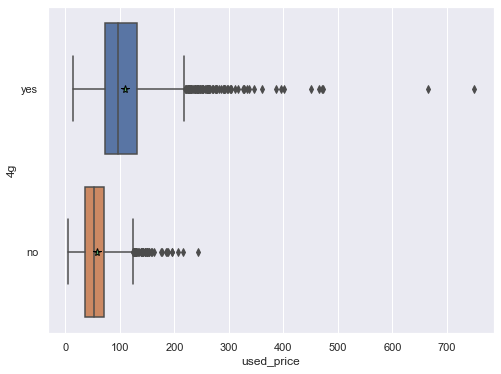

<IPython.core.display.Javascript object>

In [30]:
# Let's plot a boxplot to check the distribution of used_price by 4g, with the mean value marked as a star
boxplot_categorical(data=df, x="used_price", y="4g", figure_size=(8, 6))

* The median price of an used device is bigger for devices wiht 4g, but the difference it's not too big.

### used_price vs 5g

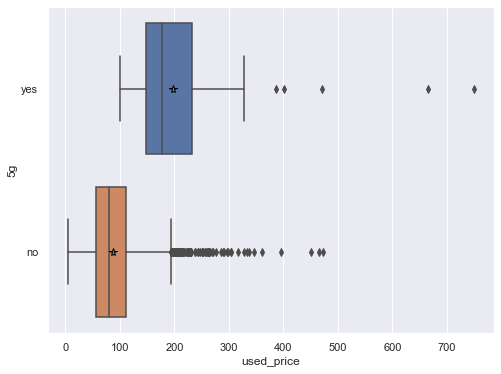

<IPython.core.display.Javascript object>

In [31]:
# Let's plot a boxplot to check the distribution of used_price by 5g, with the mean value marked as a star
boxplot_categorical(data=df, x="used_price", y="5g", figure_size=(8, 6))

* The median price of an used device is bigger for devices wiht 5g.

### brand_name vs ram
3 - The amount of RAM is important to the smooth functioning of a device. How does the amount of RAM vary with the brand?

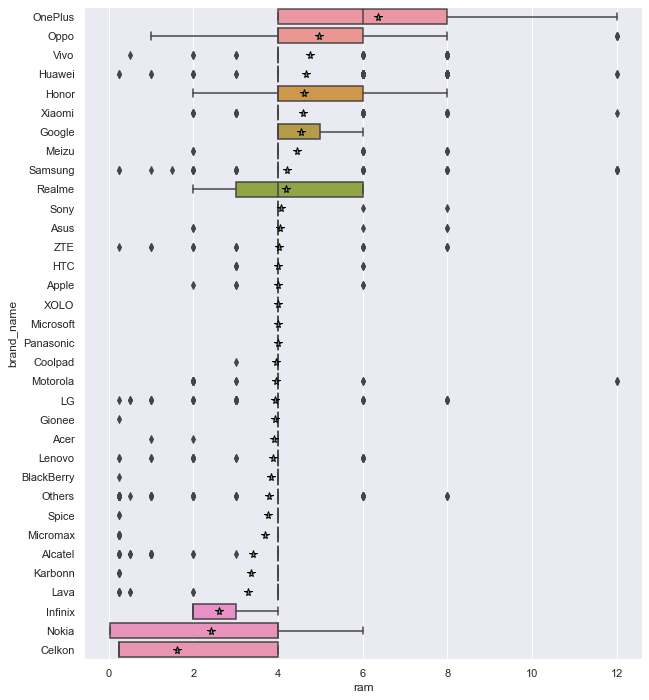

<IPython.core.display.Javascript object>

In [32]:
# Let's plot a boxplot to visualize how the amount of RAM vary with the brand
boxplot_categorical(data=df, x="ram", y="brand_name", figure_size=(10, 12))

* OnePlus offers devices wiht RAM starting in 4 GB and going to 12 GB.
* A great part of brands offer devices wiht RAM starting in 0.25 GB and going to 8 GB. 
* Few brands, as OnePLus, Oppo, Huawei and Samsung offer 12 GB.
* A great number of the devices in this dataset has 4 GB of RAM, as this is the median for most of the brands.
* Few brands offer only less than 4 GB of RAM, as Acer, Spice, Alcatel and Celkon to cite few.

### weight vs large batteries (more than 4500 mAh)
4 - A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

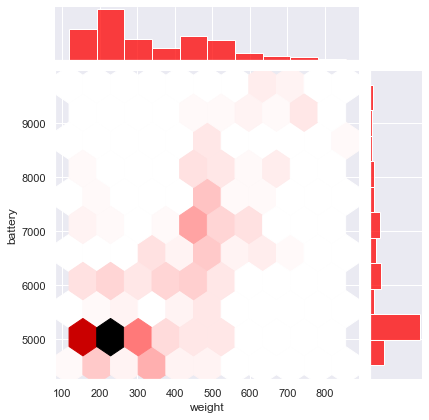

<IPython.core.display.Javascript object>

In [33]:
# Let's select the data that has only batteries with more than 4500 mAh
# Let's plot a jointplot to see the relationship between weight and battery capacity and the distribution of each feature

sns.jointplot(
    data=df[df["battery"] > 4500], x="weight", y="battery", kind="hex", color="red"
)
plt.show()

* As we expcted, the device weight increases with the increase of the battery capacity.
* For batteries with capacity greater than 4500 mAh, the weight varies from 150 g to 800 g aproximately. 
* The largest count of devices weight around 200 g and has a capacity around 5000 mAh. 

### brands vs screen size greater than 6 inches
5 - Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

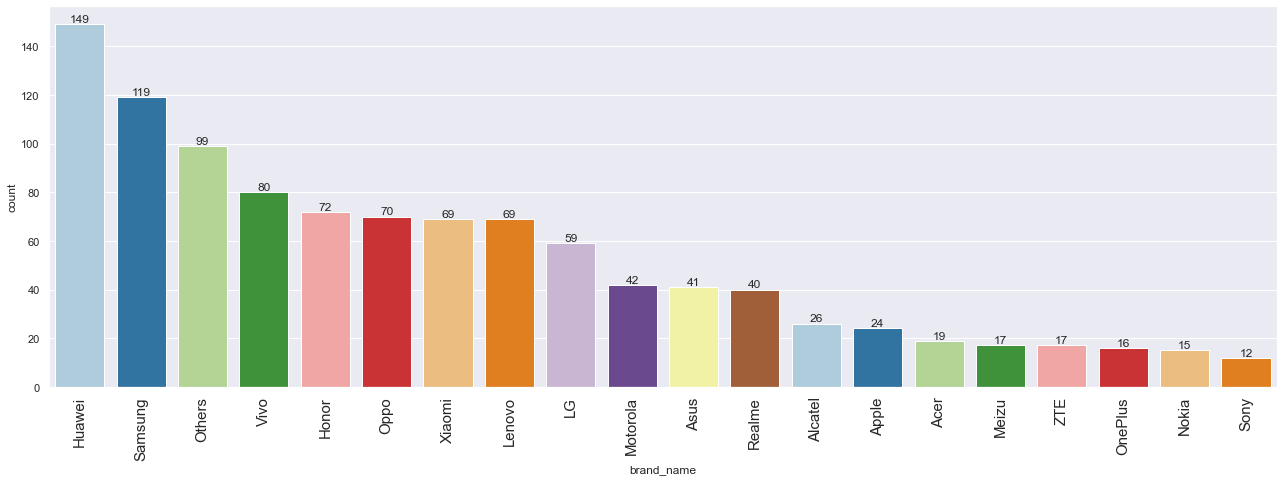

<IPython.core.display.Javascript object>

In [34]:
# Let's select the data that has only screens greater than 6 inches
# The screen size is in cm in our dataset. We know that 1 inch = 2.54 cm
# Considering that most of the countries refer to screen size in inches, let's
# transform the column screen_size to inches dividing by 2.54
# Let's plot a countplot with the first 20 brands to have a better visualization

df["screen_size_in"] = df["screen_size"] / 2.54
labeled_barplot(df[df["screen_size_in"] > 6], "brand_name", n=20)

# Let's drop the column screen_size
df.drop(["screen_size"], axis=1, inplace=True)

* In our dataset Huawei has 149 devices with sreen size larger than 6 inches.
* Samsung has 119 devices with sreen size larger than 6 inches.
* Vivo has 80 devices with sreen size larger than 6 inches.

### brands vs selfie cameras greater than 8MP
6 - Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?

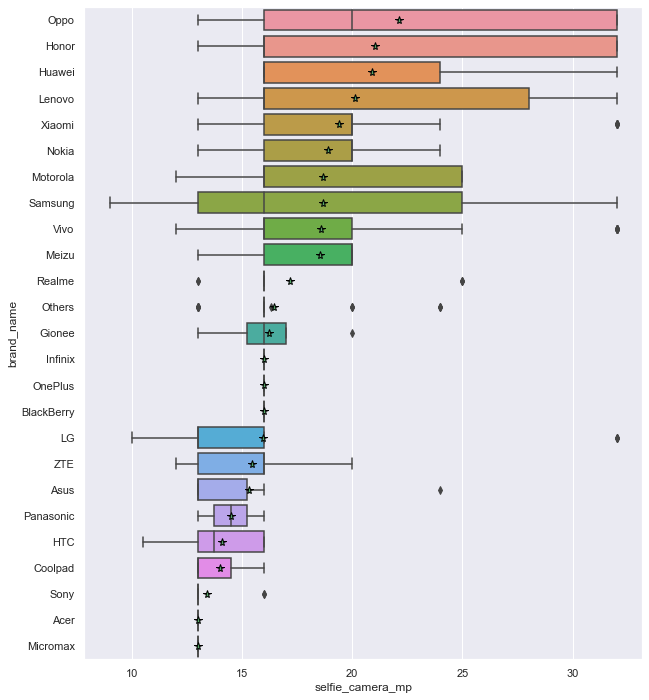

<IPython.core.display.Javascript object>

In [35]:
# Let's select the data that has only selfie cameras greater than 8 MP
# Let's plot a boxplot

boxplot_categorical(
    data=df[df["selfie_camera_mp"] > 8],
    x="selfie_camera_mp",
    y="brand_name",
    figure_size=(10, 12),
)

* Several brands like Oppo, Honor, Huawei, Lenovo and Xiaomi offer devices with a wide range of the selfie camera resolution, going from 13 MP to 32 MP.
* Other brands like LG, Asus, Panasonic, HTC and Coolpag offer devices with a small range of the selfie camera resolution, going from 10 to 16 MP.

### brand vs main camera resolution

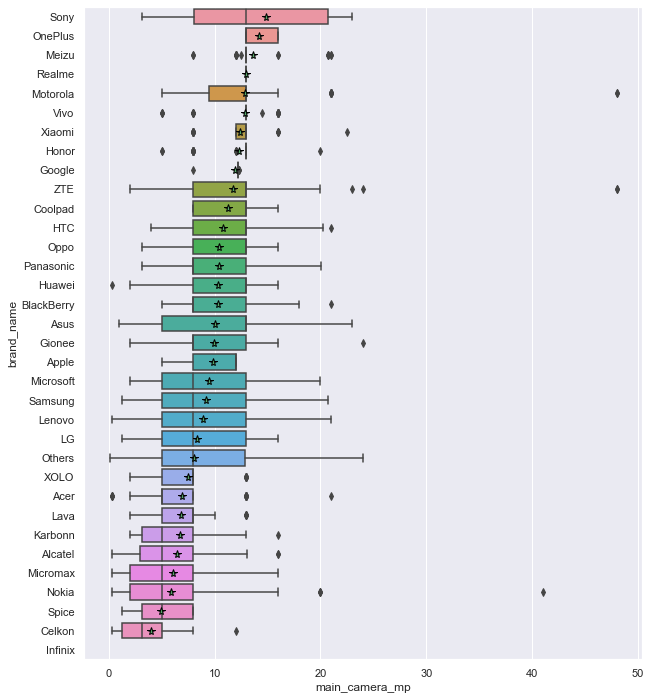

<IPython.core.display.Javascript object>

In [36]:
# Let's plot a boxplot to see the distribution of the rear camera resolution by brand
boxplot_categorical(data=df, x="main_camera_mp", y="brand_name", figure_size=(10, 12))

* The majority of the brands offer cameras with resolution going from 0.25 to 22 MP.
* One group of brands, like Sony, OnePlus and Motorola, offer cameras with bigger resolution, with the median around 12 MP.
* One group of brands, like Microsoft, Samsung and Lenovo, offer cameras wiht the median resolution around 8 MP.
* One group of brands, like Alcatel, Nokia and Spice, offer cameras with the median resolution around 5 MP. 

### brand vs int_memory

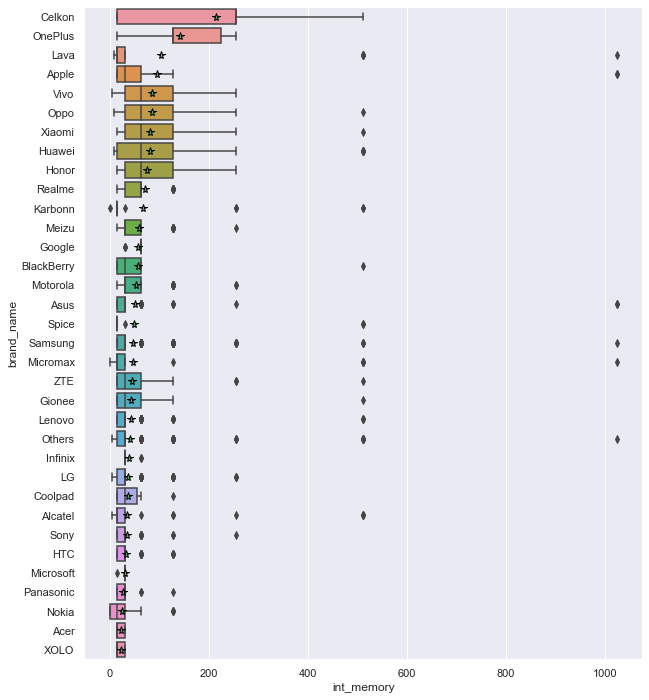

<IPython.core.display.Javascript object>

In [37]:
# Let's plot a boxplot to see the distribution of the amount of internal memory by brand
boxplot_categorical(data=df, x="int_memory", y="brand_name", figure_size=(10, 12))

* Celkon and OnePlus has a big median internal memory, around 200 GB.
* All the other brands have a median internal memory around 16, 32 or 64 GB.

### Correlation

#### 7. Which attributes are highly correlated with the price of a used device?

In [38]:
# Let's check the correlation of all features with used_price
# corr < -0.7 or corr > 0.7 indicates highly correlated attributes (strong linear dependence)
df.corr()["used_price"]

main_camera_mp      0.459209
selfie_camera_mp    0.614675
int_memory          0.378347
ram                 0.529434
battery             0.549647
weight              0.357983
release_year        0.494910
days_used          -0.385777
new_price           0.809335
used_price          1.000000
screen_size_in      0.529275
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

* The price of a new device (new_price) has a high correlation (corr = 0.809) with the price of a used device (used_price).

* The only negative correlation with the price of a used device is the days_used. The price of a used device decrease with the increase of days used (but the corr < -0.4 low correlation)

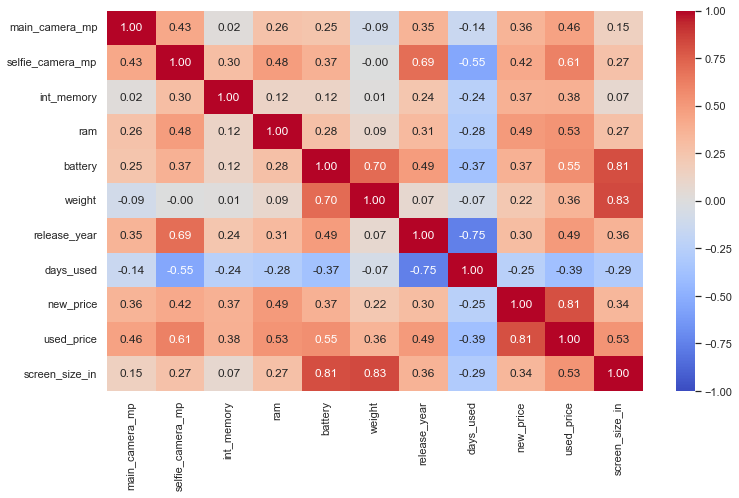

<IPython.core.display.Javascript object>

In [39]:
# Let's check the correlation of all features in a heatmap

plt.figure(figsize=(12, 7))

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

* battery and weight columns are highly correlated.
* battery and screen_size are highly correlated.
* weight and screen_size are highly correlated.
* release_year and days_used are highly correlated.
* used_price and new_price are highly correlated.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [40]:
# Checking the columns that have the most missing values
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
screen_size_in        0
dtype: int64

<IPython.core.display.Javascript object>

In [41]:
# Checking the number of missing values per row
df.isnull().sum(axis=1).value_counts()

0    3253
1     200
2       1
dtype: int64

<IPython.core.display.Javascript object>

* We have 200 rows that have one missing value.
* We have 1 row that have 2 missing values.
* We don't see a pattern of missing values (a row with certain columns missing together), so we can treat each column for missing values.

#### Let's fill the missing values in main_camera_mp, int_memory, ram and selfie_camera_mp by the median values grouped by brand_name

In [42]:
# main_camera_mp, int_memory and selfie_camera_mp are right skewed with outliers
# the ram median and mean are similar
# we are going to fill the missing values with the median.
# We are going to group the data by brand as the median varies across brands

df1 = df.copy()
df1[["main_camera_mp", "int_memory", "ram", "selfie_camera_mp"]] = df1.groupby(
    "brand_name"
)[["main_camera_mp", "int_memory", "ram", "selfie_camera_mp"]].transform(
    lambda x: x.fillna(x.median())
)

df1.isnull().sum().sort_values(ascending=False)

main_camera_mp      10
weight               7
battery              6
brand_name           0
os                   0
4g                   0
5g                   0
selfie_camera_mp     0
int_memory           0
ram                  0
release_year         0
days_used            0
new_price            0
used_price           0
screen_size_in       0
dtype: int64

<IPython.core.display.Javascript object>

#### Let's fill the missing values in weight and battery by the median values grouped by screen_size_in

In [43]:
# weight and battery are right skewed with a lot of outliers, so we are going to fill the missing values with the median.
# weight and battery have a high correlation with the screen size
# For this reason we are going to group by screen_size

df1[["weight", "battery"]] = df1.groupby("screen_size_in")[
    ["weight", "battery"]
].transform(lambda x: x.fillna(x.median()))


df1.isnull().sum().sort_values(ascending=False)

main_camera_mp      10
battery              2
brand_name           0
os                   0
4g                   0
5g                   0
selfie_camera_mp     0
int_memory           0
ram                  0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
screen_size_in       0
dtype: int64

<IPython.core.display.Javascript object>

In [44]:
# There are some values still missing in main_camera_mp and battery 
# Let's fill these remaining missing values with the column median

df1['main_camera_mp'].fillna(df1['main_camera_mp'].median(), inplace=True)
df1['battery'].fillna(df1['battery'].median(), inplace=True)

df1.isnull().sum().sort_values(ascending=False)


brand_name          0
os                  0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
screen_size_in      0
dtype: int64

<IPython.core.display.Javascript object>

### Feature engineering

#### Converting object into category type

In [45]:
cat_vars = df1.columns[df1.dtypes == "object"]

for colname in cat_vars:
    df1[colname] = df1[colname].astype("category")

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   4g                3454 non-null   category
 3   5g                3454 non-null   category
 4   main_camera_mp    3454 non-null   float64 
 5   selfie_camera_mp  3454 non-null   float64 
 6   int_memory        3454 non-null   float64 
 7   ram               3454 non-null   float64 
 8   battery           3454 non-null   float64 
 9   weight            3454 non-null   float64 
 10  release_year      3454 non-null   int64   
 11  days_used         3454 non-null   int64   
 12  new_price         3454 non-null   float64 
 13  used_price        3454 non-null   float64 
 14  screen_size_in    3454 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 312.2 KB


<IPython.core.display.Javascript object>

#### Variable transformation

* Let's check the numeric columns for skewness

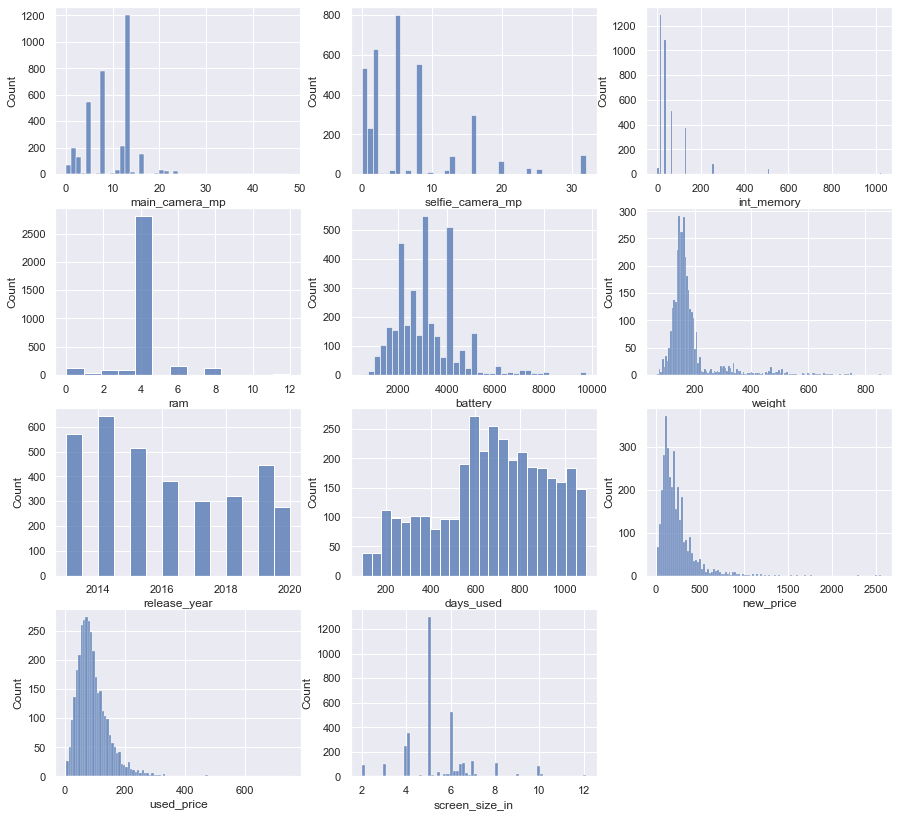

<IPython.core.display.Javascript object>

In [46]:
# creating a list with the numeric variables
dist_vars = df1.select_dtypes(include="number").columns

# ploting a histogram for the numeric variables

plt.figure(figsize=(15, 40))

for i in range(len(dist_vars)):
    plt.subplot(11, 3, i + 1)
    sns.histplot(data=df1, x=dist_vars[i])
    plt.xlabel(dist_vars[i])

* used_price is our target value and has a very right skewed distribution, so we will apply the log transformation in this variable to try to make the distribution closer to normal.
* In our independent variable, new_price is the most right skewed distribution folowed by weight. We will apply the log tranformation in both this variables to try to make the distribution closer to normal. 

In [47]:
# Let's check if the variables for the log transformation have zeros or negative values
(df1[dist_vars] <= 0).sum()

main_camera_mp       0
selfie_camera_mp    39
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
screen_size_in       0
dtype: int64

<IPython.core.display.Javascript object>

* used_price, new_price and weight don't have zero or negative values, so we can apply log tranformation without further manipulation.

In [48]:
# creating a copy of the dataframe
df2 = df1.copy()

# creating a list with the variables to apply log transformation
log_vars = ["used_price", "new_price", "weight"]

# applying the log transformation
for col in log_vars:
    df2[col + "_log"] = np.log(df2[col])

<IPython.core.display.Javascript object>

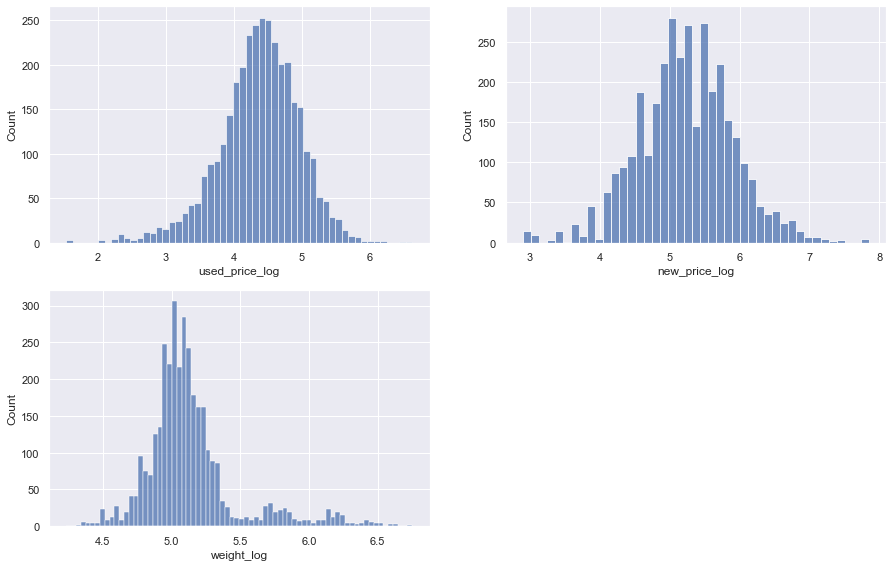

<IPython.core.display.Javascript object>

In [49]:
# Let's check the skeweness after applying log transformation
new_dist_vars = [col + "_log" for col in log_vars]

plt.figure(figsize=(15, 20))

for i in range(len(new_dist_vars)):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data=df2, x=new_dist_vars[i])
    plt.xlabel(new_dist_vars[i])

* used_price_log and new_price_log are very similar to a normal distribution.
* weight_log is closer to a normal distribution, but with a lot of outliers.

### Outlier detection

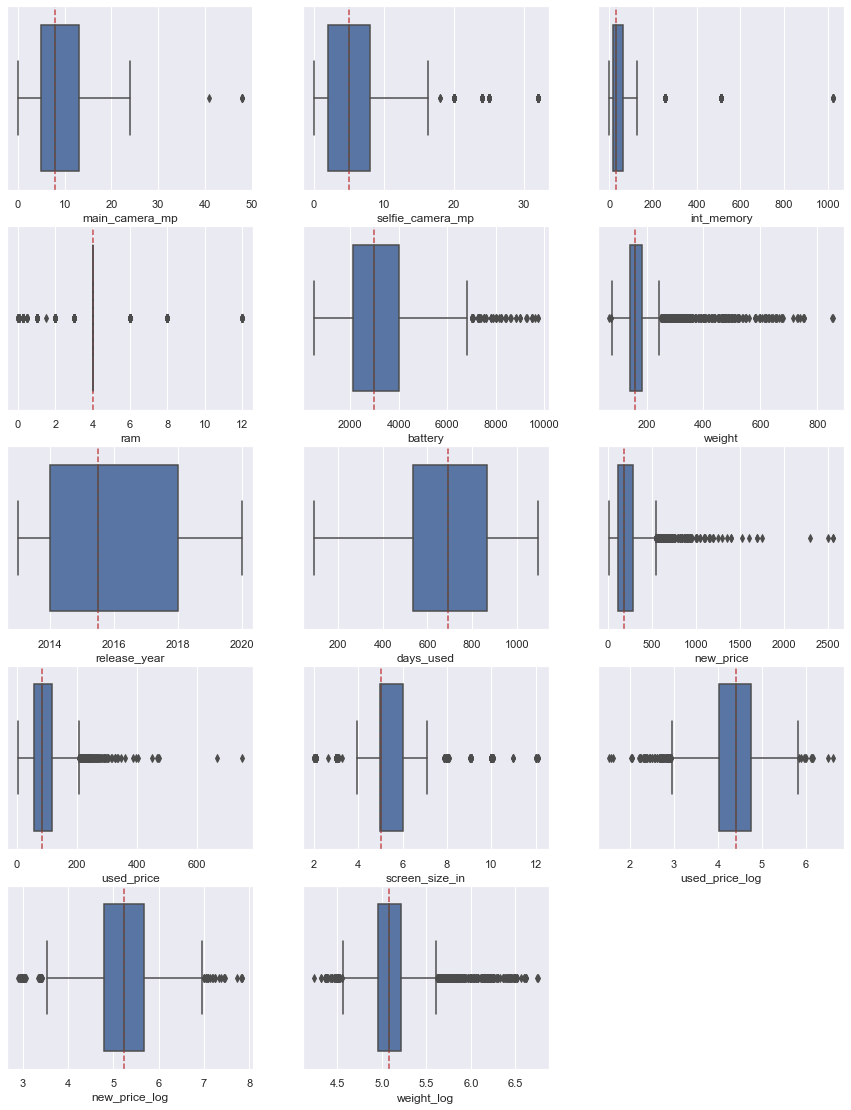

<IPython.core.display.Javascript object>

In [50]:
# Let's check the outliers there are outside 1.5 IQR (boxplot method )

# creating a list with the numeric variables
out_vars = df2.select_dtypes(include="number").columns

# Let's plot the boxplot of the numerical features to check for outliers
# The median is the red line

plt.figure(figsize=(15, 60))

for i in range(len(out_vars)):
    plt.subplot(15, 3, i + 1)
    sns.boxplot(data=df2, x=out_vars[i])
    plt.xlabel(out_vars[i])
    median = df2[out_vars[i]].median()
    plt.axvline(median, color="r", linestyle="--")

* Most of the features have outliers.
* We are not going to treat the outliers of ram because if we do it will remove the variation in this feature and it will make it a constant.
* We are not going to treat the ouliers of the discrete variables. We consider main_camera_mp, selfie_camera_mp and int_memory discrete variables. 
* release_year and days_used don't have outliers.

In [51]:
# Let's create a funtion to calculate the percentage of outliers (below Q1 -1.5 IQR and above Q3 +1.5 IQR)


def percent_outliers(df, col, IQR_constant):
    """
    Calculate the percentage of outliers

    df: dataframe
    col: dataframe column
    IQR_constant: a * IQR : the value to consider the outliers 
    """
    Percent_Out = []
    a = IQR_constant
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - a * IQR
    Upper_Whisker = Q3 + a * IQR

    Percent_Out = []

    for i in col:
        Q1 = df[i].quantile(0.25)  # 25th quantile
        Q3 = df[i].quantile(0.75)  # 75th quantile
        IQR = Q3 - Q1
        Lower_Whisker = Q1 - a * IQR
        Upper_Whisker = Q3 + a * IQR
        Percent_Out.append(
            (np.mean(df[i] < Lower_Whisker) + np.mean(df[i] > Upper_Whisker)) * 100
        )

    Percent_Out = pd.DataFrame({"col": col, "Percent_outliers_%": Percent_Out})

    return Percent_Out

<IPython.core.display.Javascript object>

In [52]:
# Creating a list with variables to check the outliers considering 1.5 IQR
col_out = [
    "battery",
    "weight",
    "weight_log",
    "screen_size_in",
    "used_price",
    "used_price_log",
    "new_price",
    "new_price_log",
]
out_percent = percent_outliers(df2, col_out, 1.5)
out_percent

,col,Percent_outliers_%
0,battery,2.229299
1,weight,10.654314
2,weight_log,11.320208
3,screen_size_in,13.028373
4,used_price,3.763752
5,used_price_log,2.460915
6,new_price,5.587724
7,new_price_log,1.910828


<IPython.core.display.Javascript object>

* In the variables used_price_log, new_price_log and battery there are around 2% of outliers. In the variables new_price and used_price there are around 5% of outliers. In weight, weight_log and screen_size there are around 10% of outliers.
* In the variables weight, weight_log and screen_size the percentage of outliers is too high, more than 10%. In our dataset we have phones and tablets, and they have very different caracteristics. This can be the reason we have so many outliers. We are going to check the ouliers considering the 3 IQR as a limit.

In [53]:
# check the outliers considering 3 IQR
out_percent = percent_outliers(df2, col_out, 3)
out_percent

,col,Percent_outliers_%
0,battery,0.057904
1,weight,7.324841
2,weight_log,4.053272
3,screen_size_in,3.474233
4,used_price,0.665895
5,used_price_log,0.086856
6,new_price,1.997684
7,new_price_log,0.000000


<IPython.core.display.Javascript object>

* Weight has 7% of outliers and screen_size_in has 3% of outliers when we used 3IQR. It's still a lot of outliers. So we are not going to remove the oultiers. We are going to run the model and check the performance of the model and the p_values. If the performance is good we are not going to treat the outliers.
* Since we have a dataset with phones and tablets, and they have very different caracteristics, we can assume that this outliers are real proper values.

## EDA

- It is a good idea to explore the data once again after manipulating it.

* After the missing values treatment and the variable transformation, let's check again the heatmap and distribution of the variables.

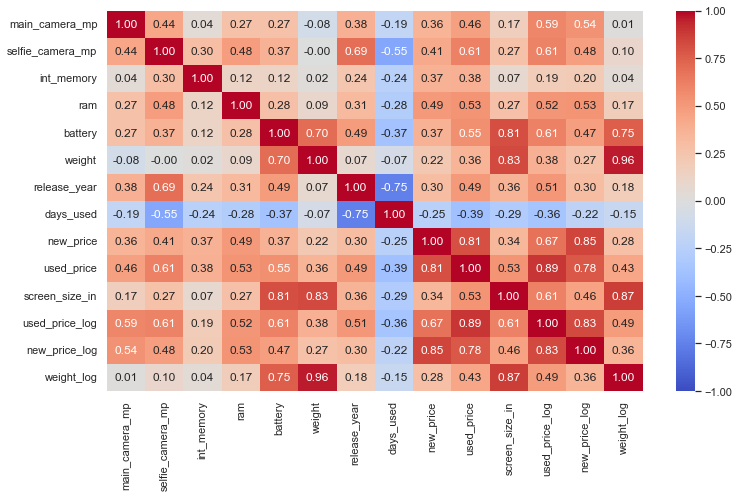

<IPython.core.display.Javascript object>

In [54]:
# heatmap
plt.figure(figsize=(12, 7))

sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

* The used_price and used_price_log in general has higher correlation with the other variables. 
* The correlation between used_price_log and new_price_log has increased to 0.83 when compared to used_price and new_price correlation 0.81.
* battery and weight columns are highly correlated.
* battery and screen_size are highly correlated.
* weight and screen_size_in are highly correlated.
* release_year and days_used are highly correlated.
* used_price and new_price are highly correlated.
* used_price_log and new_price_log are highly correlated.

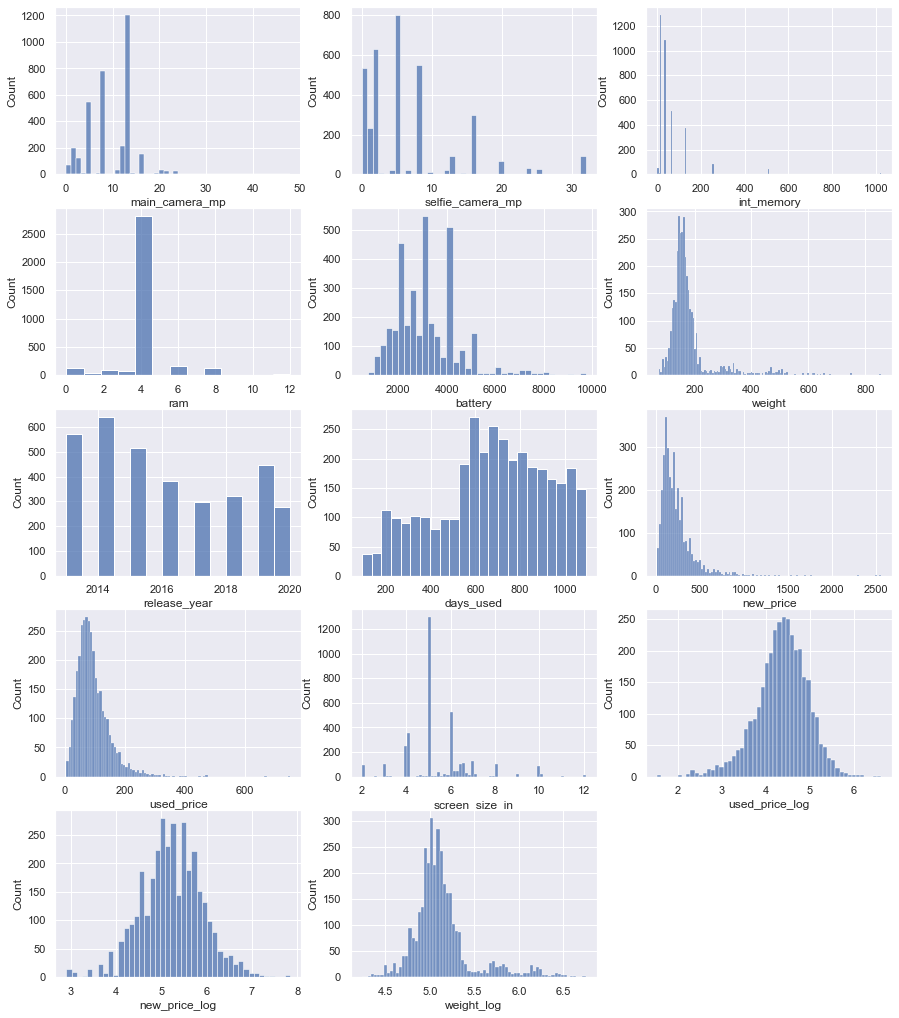

<IPython.core.display.Javascript object>

In [55]:
# distribution of the features
# creating a list with the numeric variables
dist_vars = df2.select_dtypes(include="number").columns

# ploting a histogram for the numeric variables

plt.figure(figsize=(15, 40))

for i in range(len(dist_vars)):
    plt.subplot(11, 3, i + 1)
    sns.histplot(data=df2, x=dist_vars[i])
    plt.xlabel(dist_vars[i])

* The distribution of used_price, new_price and weight_log is similar to the normal distribution after a log transformation.

### Preparing data for modeling

* We want to predict the price of a used phone/tablet. We will use the used_price_log as our dependent variable since this variable is closer to the normal distribuition than the original used_price.
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.
* We will build a Linear Regression model using the train data and then check it's performance.

In [56]:
# defining the dependent variable
# used_price_log is going to be our dependent variable, since is closer to the normal distribution than used_price.
y = df2["used_price_log"]

# defining the independent variables
X = df2.drop(["used_price_log", "used_price"], axis=1)
print(X.head())
print("\n")
print(y.head())

  brand_name       os   4g   5g  main_camera_mp  selfie_camera_mp  int_memory  \
0      Honor  Android  yes   no            13.0               5.0        64.0   
1      Honor  Android  yes  yes            13.0              16.0       128.0   
2      Honor  Android  yes  yes            13.0               8.0       128.0   
3      Honor  Android  yes  yes            13.0               8.0        64.0   
4      Honor  Android  yes   no            13.0               8.0        64.0   

   ram  battery  weight  release_year  days_used  new_price  screen_size_in  \
0  3.0   3020.0   146.0          2020        127     111.62        5.708661   
1  8.0   4300.0   213.0          2020        325     249.39        6.811024   
2  8.0   4200.0   213.0          2020        162     359.47        6.570866   
3  6.0   7250.0   480.0          2020        345     278.93       10.039370   
4  3.0   5000.0   185.0          2020        293     140.87        6.031496   

   new_price_log  weight_log  
0      

<IPython.core.display.Javascript object>

In [57]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

<IPython.core.display.Javascript object>

In [58]:
# adding the intercept to the independent variables
X = sm.add_constant(X)
X.head()

,const,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,screen_size_in,new_price_log,weight_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,13.0,5.0,64.0,3.0,3020.0,146.0,2020.0,127.0,111.62,5.708661,4.715100,4.983607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,13.0,16.0,128.0,8.0,4300.0,213.0,2020.0,325.0,249.39,6.811024,5.519018,5.361292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,13.0,8.0,128.0,8.0,4200.0,213.0,2020.0,162.0,359.47,6.570866,5.884631,5.361292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,13.0,8.0,64.0,6.0,7250.0,480.0,2020.0,345.0,278.93,10.039370,5.630961,6.173786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,13.0,8.0,64.0,3.0,5000.0,185.0,2020.0,293.0,140.87,6.031496,4.947837,5.220356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [59]:
# split into train and test sets in a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [60]:
# checking the number of rows in the train and test dataset
print(f"The train data has {X_train.shape[0]} rows.")
print(f"The test data has {X_test.shape[0]} rows.")

The train data has 2417 rows.
The test data has 1037 rows.


<IPython.core.display.Javascript object>

## Building a Linear Regression model using statsmodels

* We want to predict the price of a used phone/tablet

In [61]:
# fitting a linear model
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     263.8
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:55:23   Log-Likelihood:                 147.48
No. Observations:                2417   AIC:                            -193.0
Df Residuals:                    2366   BIC:                             102.3
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -47.23

<IPython.core.display.Javascript object>

* The model $R^2$  is 0.848 which is good, so we are not going to treat the outliers unless our model starts to present a low performance. 

## Model performance evaluation

**Let's check the performance of the model using different metrics.**

* We will check the model performance on the actual prices and not the log values.
* We will create a function that will convert the log prices to actual prices and then check the performance.
* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [62]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]  # number of observations
    k = predictors.shape[1]  # number of independent variables
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # calculating R-squared and adjusted R-squared with the new_price_log as it is in the model
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    # calcutating RMSE, MAE and MAPE with the actual prices
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [63]:
# checking the model performance on train set (70% data)
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)

# checking the model performance on the test set (30% data)
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)

# comparing test and training performance

test_train_comp = pd.concat([olsmodel_train_perf.T, olsmodel_test_perf.T], axis=1)
test_train_comp.columns = ["Train Performance", "Test Performance"]

test_train_comp

,Train Performance,Test Performance
RMSE,25.621093,24.161337
MAE,16.308182,16.488376
R-squared,0.847889,0.844900
Adj. R-squared,0.844609,0.836869
MAPE,18.554511,19.315965


<IPython.core.display.Javascript object>

* The train and test $R^2$ are 0.84, so the model explains 84%  of the variance in the price of used devices, in the train and test sets.
* The training $R^2$ and test  $R^2$ are high, so the model is not underfitting.
* The train and test RMSE and MAE are similar, so the model is not overfitting the train data.
* MAE means that the model can predict the price of a used device within a mean error of 16 euros.
* MAPE means the model can predict within around 19% of the used device price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Let's check the following Linear Regression assumptions:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity


### Test for multicollinearity

* Multicollinearity occurs when the independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* We are going to detect multicollinearity using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        round(variance_inflation_factor(predictors.values, i), 2)
        for i in range(predictors.shape[1])
    ]

    vif.sort_values(by="VIF", ascending=False).reset_index()
    vif.reset_index(drop=True, inplace=True)
    return vif

<IPython.core.display.Javascript object>

In [65]:
checking_vif(X_train)

,feature,VIF
0,const,3915934.31
1,main_camera_mp,2.31
2,selfie_camera_mp,2.88
3,int_memory,1.55
4,ram,2.28
5,battery,4.14
6,weight,20.51
7,release_year,5.07
8,days_used,2.66
9,new_price,5.33


<IPython.core.display.Javascript object>

* The features that have high multicolinearity are weight and weight_log, and this two features are correlated (the original and log transformed weight).
* The feature that have moderate multicolinearity is screen_size_in, that is highly correlated with weight. 
* New_price and new_price_log have a moderate multicolinearity and this two features are correlated (the original and log transformed new_price).
* We will ignore the VIF for the dummy variables.

### Removing Multicollinearity

To remove multicollinearity we will follow the steps:

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

In [66]:
# Let's define a functions that calculates the adjusted R-squared and RMSE when dropping the
# columns that have moderate or high multicollinearity


def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.drop([cols], axis=1)

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [67]:
# Creating a list with moderate and high multicollinearity features
col_list = [
    "weight",
    "release_year",
    "new_price",
    "screen_size_in",
    "new_price_log",
    "weight_log",
]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.844713,0.230059
1,new_price,0.844182,0.230453
2,release_year,0.843071,0.231273
3,weight_log,0.842347,0.231806
4,screen_size_in,0.842334,0.231815
5,new_price_log,0.805615,0.257398


<IPython.core.display.Javascript object>

* weight has the least impact in Adjusted R-squared, so we will drop weight and check VIF again.

In [68]:
# dropping the weight
X_train1 = X_train.drop(["weight"], axis=1)
X_test1 = X_test.drop(["weight"], axis=1)

<IPython.core.display.Javascript object>

In [69]:
# checking VIF again
vif = checking_vif(X_train1)
print("VIF after dropping weight")
vif

VIF after dropping weight


,feature,VIF
0,const,3807621.15
1,main_camera_mp,2.29
2,selfie_camera_mp,2.87
3,int_memory,1.55
4,ram,2.27
5,battery,4.08
6,release_year,4.89
7,days_used,2.65
8,new_price,5.31
9,screen_size_in,7.15


<IPython.core.display.Javascript object>

* Dropping weight has brought the VIF of release_year below 5.
* New_price, screen_size_in, new_price_log and weight_log still have moderate multicolinearity.

In [70]:
# Creating a list with moderate and high multicollinearity features
col_list = [
    "new_price",
    "screen_size_in",
    "new_price_log",
    "weight_log",
]

res = treating_multicollinearity(X_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,new_price,0.844203,0.230437
1,screen_size_in,0.842296,0.231843
2,weight_log,0.838443,0.234658
3,new_price_log,0.805144,0.257709


<IPython.core.display.Javascript object>

* new_price has the least impact in Adjusted R-squared, so we will drop new_price and check VIF again.

In [71]:
# dropping new_price
X_train2 = X_train1.drop(["new_price"], axis=1)
X_test2 = X_test1.drop(["new_price"], axis=1)

<IPython.core.display.Javascript object>

In [72]:
# checking VIF again
vif = checking_vif(X_train2)
print("VIF after dropping new_price")
vif

VIF after dropping new_price


,feature,VIF
0,const,3711274.64
1,main_camera_mp,2.27
2,selfie_camera_mp,2.80
3,int_memory,1.36
4,ram,2.25
5,battery,4.08
6,release_year,4.78
7,days_used,2.65
8,screen_size_in,7.10
9,new_price_log,3.14


<IPython.core.display.Javascript object>

* Dropping new_price has brought the VIF of new_price_log below 5.
* Screen_size_in and weight_log still have moderate multicolinearity.

In [73]:
# Creating a list with moderate and high multicollinearity features
col_list = [
    "screen_size_in",
    "weight_log",
]

res = treating_multicollinearity(X_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size_in,0.841572,0.232375
1,weight_log,0.838102,0.234905


<IPython.core.display.Javascript object>

 * screen_size_in has the least impact in Adjusted R-squared, so we will drop screen_size_in and check VIF again.

In [74]:
# dropping screen_size_in
X_train3 = X_train2.drop(["screen_size_in"], axis=1)
X_test3 = X_test2.drop(["screen_size_in"], axis=1)

<IPython.core.display.Javascript object>

In [75]:
# checking VIF again
vif = checking_vif(X_train3)
print("VIF after dropping screen_size_in")
vif

VIF after dropping screen_size_in


,feature,VIF
0,const,3645848.23
1,main_camera_mp,2.27
2,selfie_camera_mp,2.80
3,int_memory,1.36
4,ram,2.25
5,battery,3.76
6,release_year,4.70
7,days_used,2.65
8,new_price_log,3.12
9,weight_log,3.11


<IPython.core.display.Javascript object>

* Now all the features have a low multicolinearty.

In [76]:
# Let's check our model with the latest train set
olsmodel1 = sm.OLS(y_train, X_train3).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     274.1
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:55:25   Log-Likelihood:                 122.05
No. Observations:                2417   AIC:                            -148.1
Df Residuals:                    2369   BIC:                             129.8
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -51.58

<IPython.core.display.Javascript object>

- Adjusted R-squared has dropped from 0.845 to 0.842, which shows that the dropped columns weight, new_price and screen_size_in did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

**p-value of predictor variables P > | t |:**

* For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

   - $H_o$ : Independent feature is not significant  ($\beta_i = 0$)
   - $H_a$ : Independent feature it is significant ($\beta_i \neq 0$)
   
* P > | t | gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.

* A p-value of less than 0.05 is considered to be statistically significant.


**Dealing with high p-value variables**

* We will drop the variables that have a p_value greate than 0.05 as they not impact the dependent variable.

- int_memory, battery, days_used, all the brand_names, os_Windows, os_IOS have p-value > 0.05. So, they are not significant.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

In [77]:
# initial list of columns
cols = X_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'release_year', 'new_price_log', 'weight_log', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [78]:
# Creating a new train and test set with the columns that are significant (p-value < 0.05)
X_train4 = X_train3[selected_features]
X_test4 = X_test3[selected_features]

<IPython.core.display.Javascript object>

In [79]:
# running the OLS model
olsmodel2 = sm.OLS(y_train, X_train4).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     916.8
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:55:25   Log-Likelihood:                 104.34
No. Observations:                2417   AIC:                            -178.7
Df Residuals:                    2402   BIC:                            -91.82
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -47.4190      6

<IPython.core.display.Javascript object>

**Now all the features have p-value < 0.05, so we consider the features in X_train4 as the final set of predictor variables and olsmodel2 as the final model.**

* Now adjusted R-squared is 0.841, which means our model is able to explain aproximately 84% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmodel* (the very first model where we considered all the variables) was 0.845. This shows that the variables we dropped were not affecting the model much.

Now we'll check the rest of the assumptions on *olsmodel2*.

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

### Test for Linearity and Independence

* We will make a plot of fitted values vs residuals.
* If they don't follow any pattern, then we say the model is linear and residuals are independent.
* Otherwise, the model is showing signs of non-linearity and residuals are not independent. In this case we can try to transform the variables and make the relationships linear.

In [80]:
# let's create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.823546,0.263941
1525,4.448399,4.688514,-0.240114
1128,4.315353,4.300692,0.014660
3003,4.282068,4.259070,0.022998
2907,4.456438,4.488432,-0.031994


<IPython.core.display.Javascript object>

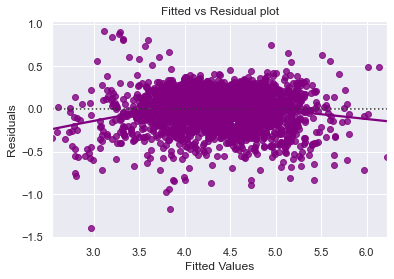

<IPython.core.display.Javascript object>

In [81]:
# let's plot the fitted values versus residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* We don't see any pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### Test for Normality

* Error terms, or residuals, should be normally distributed. 

* We will check the normality by:

  - Checking the shape of the histogram of residuals.
  - Checking the Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
  - Checking the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed
    
* If this assumption is not followed, we can try to transform our variables.

<AxesSubplot:xlabel='Residuals', ylabel='Count'>

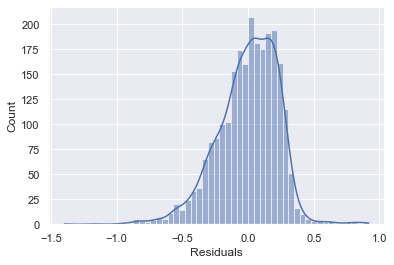

<IPython.core.display.Javascript object>

In [82]:
# Checking the shape of the histogram
sns.histplot(data=df_pred, x="Residuals", kde=True)

* The histogram of residuals has a bell shape that approximates a normal distribution.

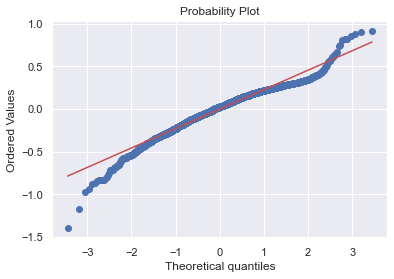

<IPython.core.display.Javascript object>

In [83]:
# Checking the Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals more os less follow a straight line, except for the tails.

In [84]:
# Let's check the Shapiro_Wilk test
from scipy.stats import shapiro

statistic, p_value = shapiro(df_pred["Residuals"])
print("The p-value is", p_value)

The p-value is 6.055821374295002e-23


<IPython.core.display.Javascript object>

* Since the p-value is less than the significance level (6.055e-23 < 0.05) the residuals don't follow a normal distribution.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### Test for Homoscedasticity

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

* We will use the goldfeldquandt test to check for homoscedasticity. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [85]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train4)
lzip(name, test)

[('F statistic', 1.0458955028677401), ('p-value', 0.21918789748869189)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**We have checked all the assumptions of linear regression and they are satisfied.**

## Final Model Summary

**Let's create the final statsmodel model and print the summary to gain insights.**

In [86]:
olsmodel_final = sm.OLS(y_train, X_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     916.8
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:55:27   Log-Likelihood:                 104.34
No. Observations:                2417   AIC:                            -178.7
Df Residuals:                    2402   BIC:                            -91.82
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -47.4190      6

<IPython.core.display.Javascript object>

## Insights

1. The model to predict the price of a used phone/tablet is:
    - log(used_price) = -47.42 + 0.0215 main_camera_mp + 0.0141 selfie_camera_mp + 0.0211 ram + 0.0232 release_year + 0.4263 log(new_price) + 0.4487 log(weight) + 0.1394 brand_name_Karbonn + 0.0468 brand_name_Lenovo + 0.0854 brand_name_Nokia - 0.0594 brand_name_Sony + 0.0780 brand_name_Xiaomi - 0.0981 os_Others + 0.0439 4g_yes - 0.0655 5g_yes
    

2. The model to predict the price of a used phone/tablet when the device has 4g (4g_yes=1) and the brand is none of the listed in the model could be write as:
    - log(used_price) = -47.37 + 0.0215 main_camera_mp + 0.0141 selfie_camera_mp + 0.0211 ram + 0.0232 release_year + 0.4263 log(new_price) + 0.4487 log(weight) - 0.0981 os_Others


3. The coeficients of the independent variables that are positive are the main_camera_mp, selfie_camera_mp, ram, release_year, new_price, weight, brand_name_Karbonn, brand_name_Lenovo, brand_name_Nokia, brand_name_Xiaomi, 4g_yes, so an increase in these coefficients will increase the price of the used device.

4. The coeficients of the independent variables that are negative are brand_name_Sony, os_Others and 5g_yes, so an increase in these coefficients will decrease the price of the used device. If the device is from Sony, has 5g and has an OS system that it's not and Windows, Android or iOS the device will not be as valuable.


5. The price of the used device is log tranformed, so the interpretation of the coefficients of the predictor variables is:
    - a one unit increase in main_camera_mp would lead to a 2.17% increase in the used device price, holding all other predictors constant. [100 * {exp(0.0215) - 1}] = 2.17
    - a one unit increase in selfie_camera_mp would lead to a 1.42% increase in the used device price, holding all other predictors constant. [100 * {exp(0.0141) - 1}] = 1.42
    - a 1% increase in weight would lead to a 0.45% increase in the used device price, holding all other predictors constant. [100 * {1.01**(0.4487) - 1}] = 0.447
    - a 1% increase in the price of a new device would lead to a 0.42% increase in the used device price, holding all other predictors constant. [100 * {1.01**(0.4263) - 1}] = 0.425
    

6. Considering the range of each independent variable in our dataset, and considering how the value of the independent variables changes from one observation to another, we can make the observations:

    - if the resolution of the main camera increases by 5 MP, then the price of the used device increases in 11.3%. [100 * {exp(5*0.0215) - 1}] = 11.3 
    
    - if the resolution of the selfie camera increases by 3 MP, then the price of the used device increases in 4.3%. [100 * {exp(3*0.0141) - 1}] = 4.3 
    
    - if the amount of RAM increases in 2 GB, then the price of the used device increases in 4.3%. [100 * {exp(2*0.0211) - 1}] = 4.3 
    
    - if the device is one year younger, then the price of the used device increases in 2.3%. [100 * {exp(0.0232) - 1}] = 2.3 
    
    - if the price of the new device increases by 50%, the price of the used device increases in 18.8 %.  [100 * {1.5 **(0.4263) - 1}] = 18.87
    
    - if the weight of the device increases by 50%, the price of the used device increases in 20 %. [100 * {1.5**(0.4487) - 1}] = 19.95
    
    - if the device has and operational system other than Windows, Android or iOS, the price of the used device decreases in 9.3% [100 * {exp(-0.0981) - 1}] = -9.3
    
    - if the device has 4G available, the price of the used device increases in 4.5% [100 * {exp(0.0439) - 1}] = 4.49
    
    - if the device has 5G available, the price of the used device decreases in 6.3% [100 * {exp(-0.0655) - 1}] = -6.3
    
    - if the device is from the Nokia brand, the price of the used device increases in 8.9% [100 * {exp(0.0854) - 1}] = 8.9
    

**Let's check the model performance on the train and test set.**

In [87]:
# checking model performance on the train set (70% data)
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, X_train4, y_train
)

# checking the model performance on the test set (30% data)
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, X_test4, y_test)

# comparing test and training performance

test_train_comp = pd.concat(
    [olsmodel_final_train_perf.T, olsmodel_final_test_perf.T], axis=1
)
test_train_comp.columns = ["Train Performance", "Test Performance"]

test_train_comp

,Train Performance,Test Performance
RMSE,25.753500,24.133540
MAE,16.481667,16.540728
R-squared,0.842361,0.841544
Adj. R-squared,0.841376,0.839216
MAPE,18.865715,19.449040


<IPython.core.display.Javascript object>

* The model is able to explain about 84% of the variation in the data, which is very good.

* The train and test RMSE and MAE are similar. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 19% the device used price. 

* The MAE on the test set suggests we can predict the used device price within a mean error of 16.5 euros.

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes.

**Let's visualize some predictions.**

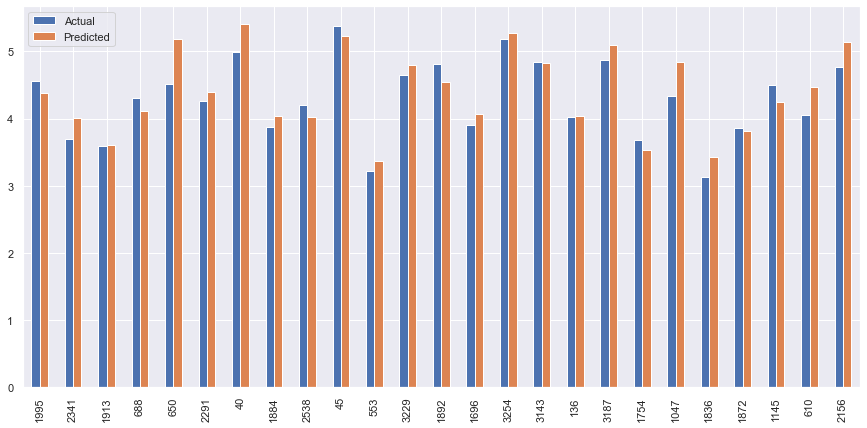

<IPython.core.display.Javascript object>

In [88]:
# predictions on the test set
pred = olsmodel_final.predict(X_test4)
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})

# Let's get a sample of 25 records and plot a bar graph
df_pred_test_sample = df_pred_test.sample(25, random_state=1)
df_pred_test_sample.plot(kind="bar", figsize=(15, 7))
plt.show()

* We can visualize that the actual and predicted values are comparable. Our model has returned good prediction results.

### Final Model comparison with very first model

**Let's compare the initial model and the final statsmodels model.**

In [89]:
# training performance comparison

models_train_comp_df = pd.concat(
    [olsmodel_train_perf.T, olsmodel_final_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,25.621093,25.753500
MAE,16.308182,16.481667
R-squared,0.847889,0.842361
Adj. R-squared,0.844609,0.841376
MAPE,18.554511,18.865715


<IPython.core.display.Javascript object>

In [90]:
# test performance comparison

models_test_comp_df = pd.concat(
    [olsmodel_test_perf.T, olsmodel_final_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,24.161337,24.133540
MAE,16.488376,16.540728
R-squared,0.844900,0.841544
Adj. R-squared,0.836869,0.839216
MAPE,19.315965,19.449040


<IPython.core.display.Javascript object>

* The performance of the two models is close to each other, which shows that the variables we dropped were not affecting much the model.

## Actionable Insights and Recommendations



1. The model to predict the price of a used phone/tablet is:
    - log(used_price) = -47.42 + 0.0215 main_camera_mp + 0.0141 selfie_camera_mp + 0.0211 ram + 0.0232 release_year + 0.4263 log(new_price) + 0.4487 log(weight) + 0.1394 brand_name_Karbonn + 0.0468 brand_name_Lenovo + 0.0854 brand_name_Nokia - 0.0594 brand_name_Sony + 0.0780 brand_name_Xiaomi - 0.0981 os_Others + 0.0439 4g_yes - 0.0655 5g_yes
   

2. ReCell should sell more devices with bigger camera resolutions as this increase the price of the used device. 
3. ReCell should sell more devices with larger screens (bigger weight) as this increase the price of the used device.
4. Devices with 4g has a better reselling price than devices with 5g, so ReCell should focus on this segment.
5. Brands like Nokia, Lenovo, Karbonn and Xiaomi have a higher reselling price than the other brands, so ReCell should have more of this brands in stock.
6. Sony is a brand that has a lower reselling price when compared with the other brands. Since this brand represents only a small portion of the manufacturers, ReCell should consider if it's still worth to sell this brand or to raise the price.
7. Devices that have a operational system other than Android, Windows or iOS have a lower used price. ReCell should consider reselling only devices with Android, Windows and iOS.
